In [2]:
#import requaired library and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load the train dataset
car=pd.read_csv("car.csv")

In [4]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
car.shape

(205, 26)

In [6]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(car.iloc[:, :-1], car.iloc[:, -1], 
                                                    #test_size = 0.3, 
                                                    #random_state = 42)

In [9]:
#car_Id is not important to car price analysis so we can drop the columns
car.drop("car_ID",axis=1,inplace=True)

In [10]:
#for check the coluns name we use .columns 
car.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [11]:
#for check the basic information 
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [12]:
#check the columns type like its int, float and object(string)
car.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

# Data Cleaning and Preparation

In [13]:
#check the null values
car.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

above we can sea there is no null values in oour data set

In [14]:
car["CarName"] = car["CarName"].str.split(" ",  expand = True)
#car['CarNames'] = CarNames[0]

In [15]:
#car.drop("CarName",axis=1, inplace=True)

In [16]:
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


above we can sea there is no null values in oour data set

In [17]:
car.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

some speling mistake

In [18]:
#rename the incorrect name  to correct
car['CarName'] = car['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [19]:
#check the name are update
car.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [20]:
#car.loc[car.duplicated()]

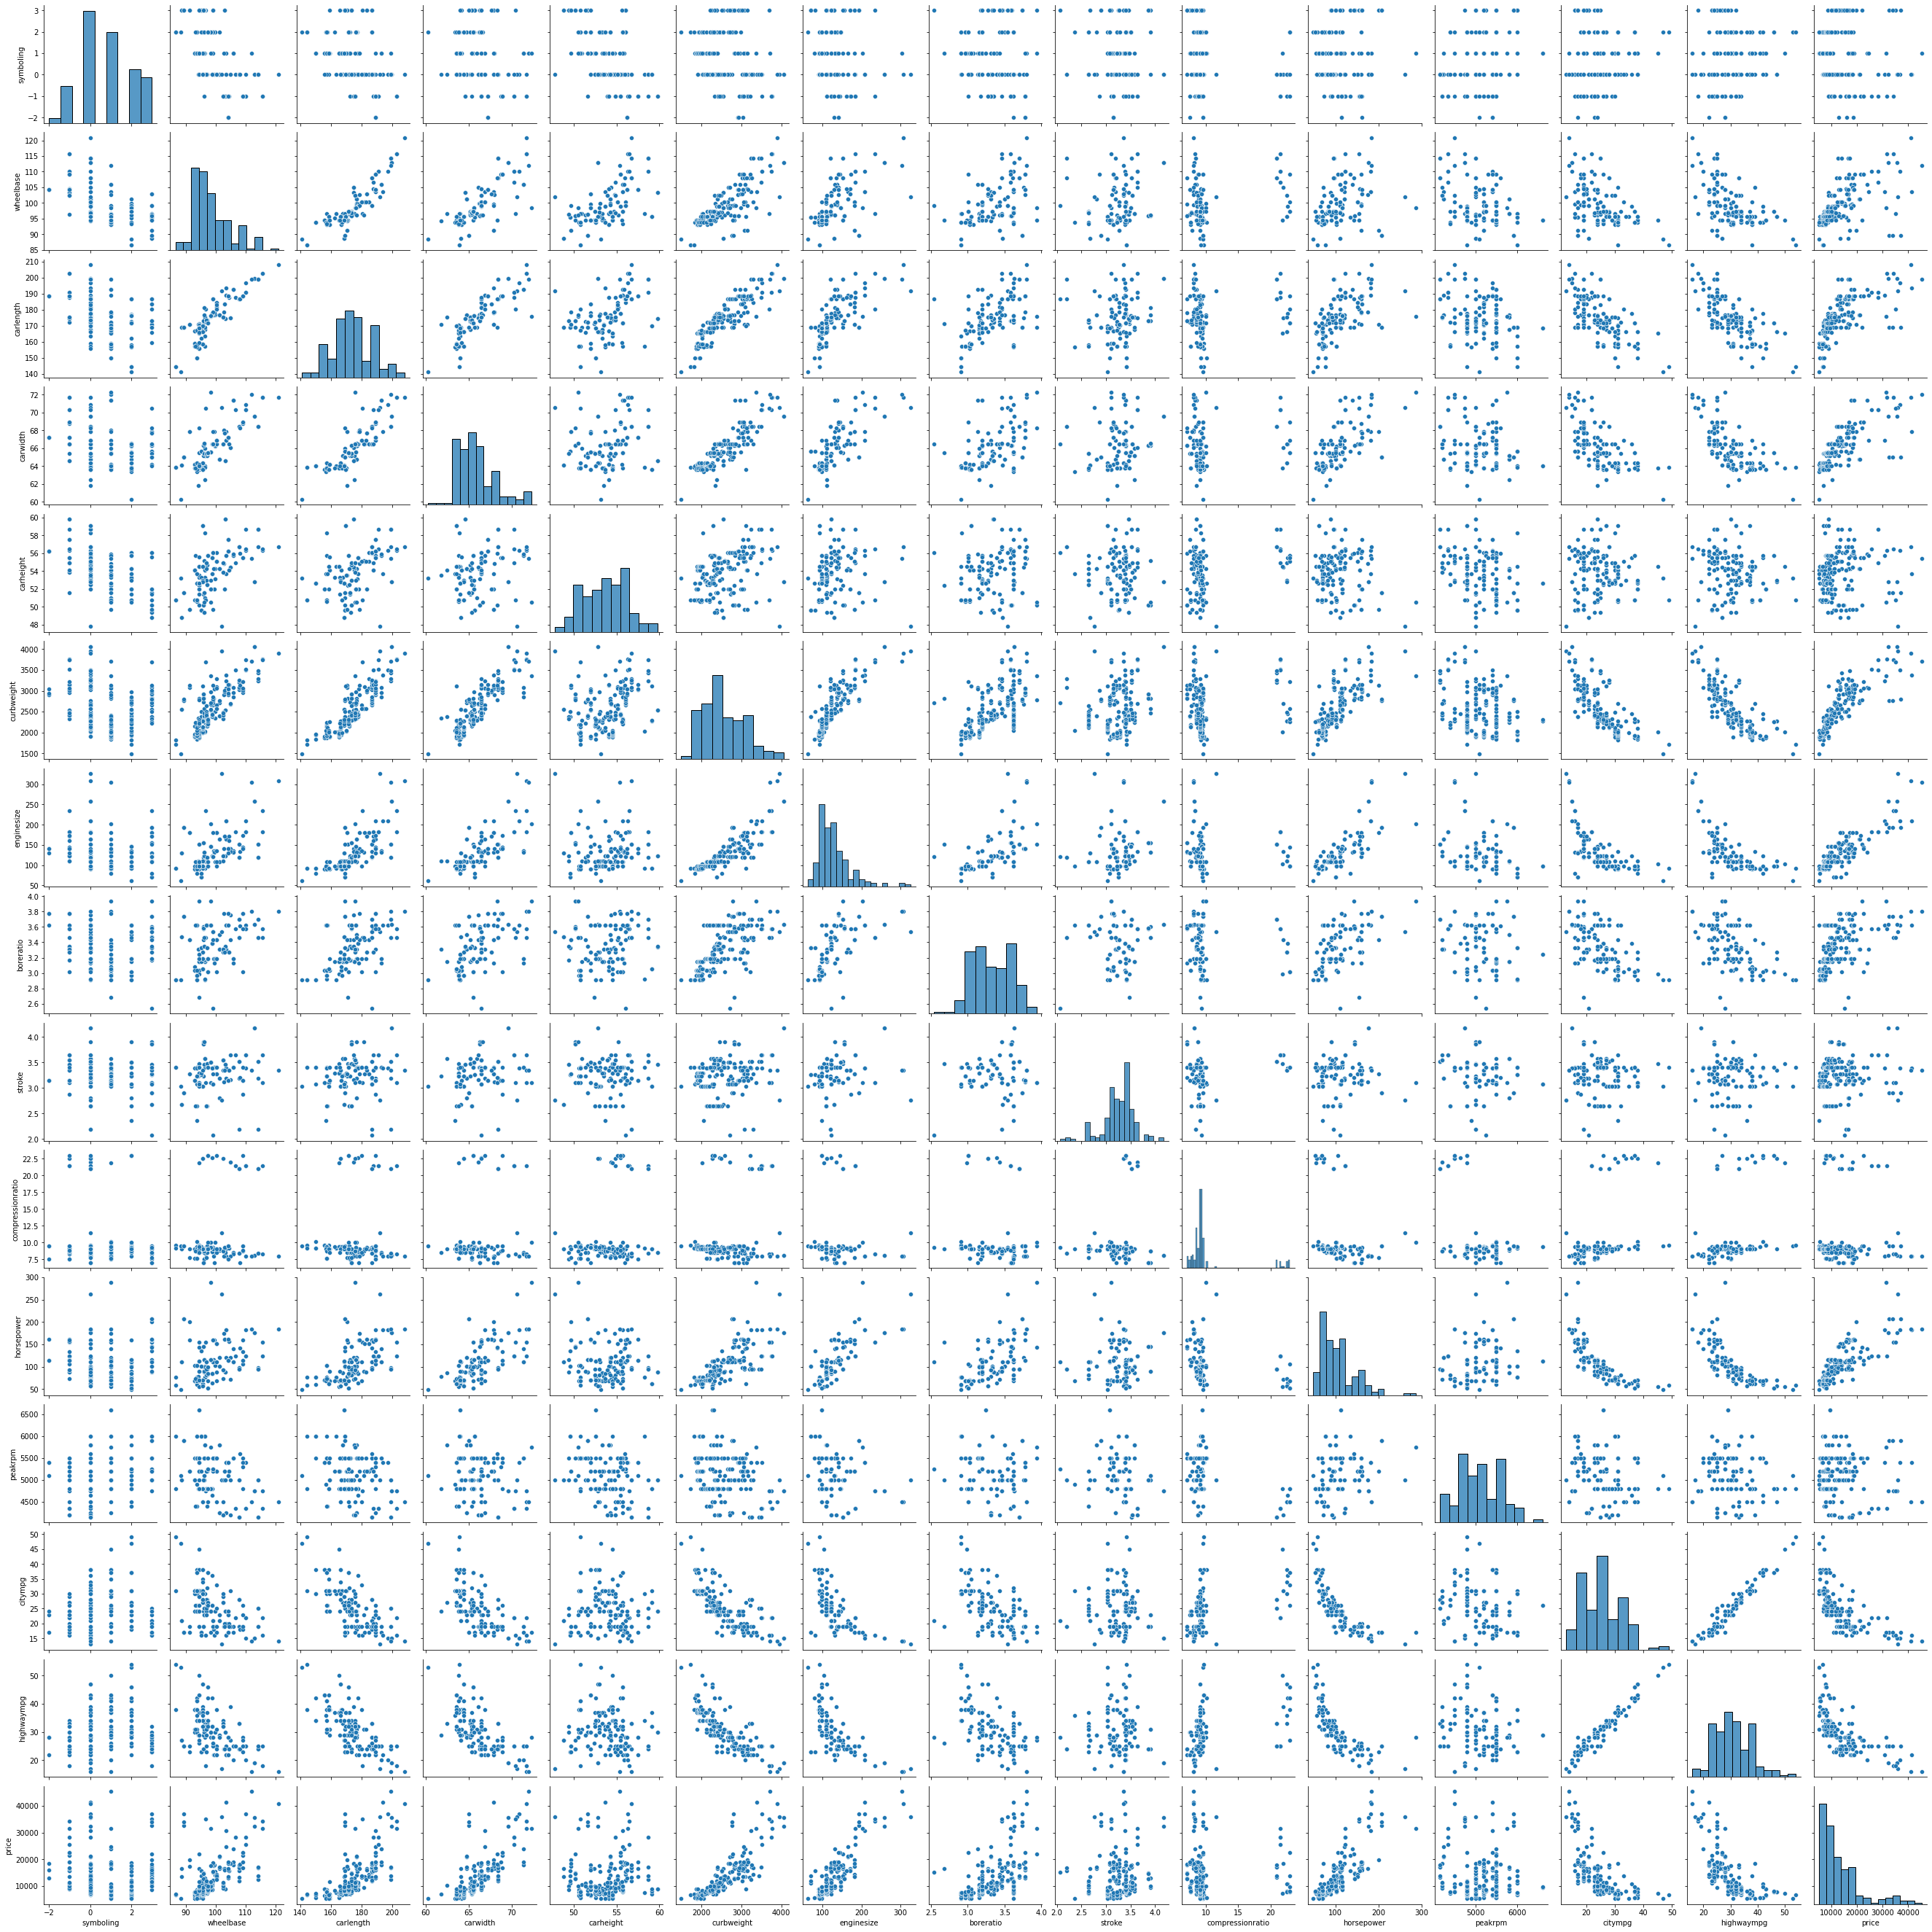

In [21]:
sns.pairplot(car)

<AxesSubplot:>

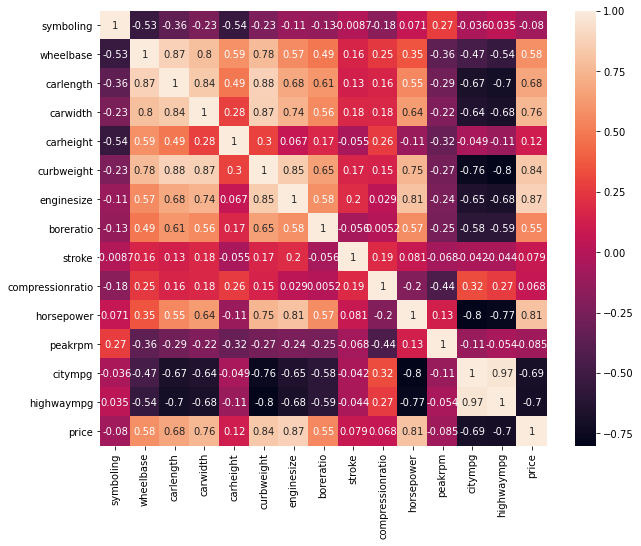

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(car.corr(),annot=True)

In [23]:
corr=car.corr()
print (corr['price'].sort_values(ascending=False)[:10], '\n') #top 15 values positive correlation
print ('----------------------')
print (corr['price'].sort_values(ascending=False)[-5:]) #last 5 values`negative correlation

price         1.000000
enginesize    0.874145
curbweight    0.835305
horsepower    0.808139
carwidth      0.759325
carlength     0.682920
wheelbase     0.577816
boreratio     0.553173
carheight     0.119336
stroke        0.079443
Name: price, dtype: float64 

----------------------
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64


Text(0.5, 1.0, 'care price distribution')

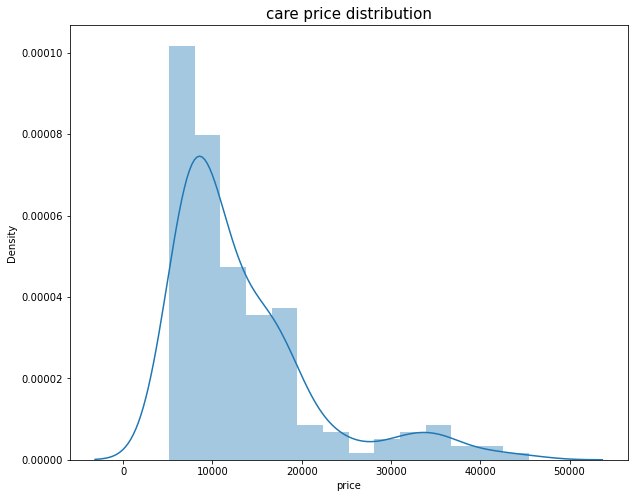

In [24]:
#now lets understand our target variabe in brife
plt.figure(figsize=(10,8))
sns.distplot(car["price"])
plt.title("care price distribution",fontsize=15)

our target variable(price) is right side skew

In [25]:
#check the skewness
car["price"].skew()

1.7776781560914454

Text(0.5, 1.0, 'outlier in target variable')

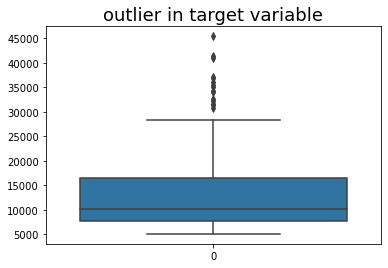

In [26]:
#now check the outlier in our target variable
sns.boxplot(data=car["price"])
plt.title("outlier in target variable",fontsize=18)

in above boxplot outliers are present buble are outliers

In [27]:
#check the statistical summury of our target variable

In [28]:
car["price"].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [29]:
#now saprating CATEGORICAL AND NUMERIC DATA
numeric=car.select_dtypes(exclude=["object"]).columns

In [30]:
numeric

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [31]:
#caregorical data
cat=car.select_dtypes(include=["object"]).columns

In [32]:
cat

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

# data visualization

Text(0.5, 1.0, 'namewise distribution of car')

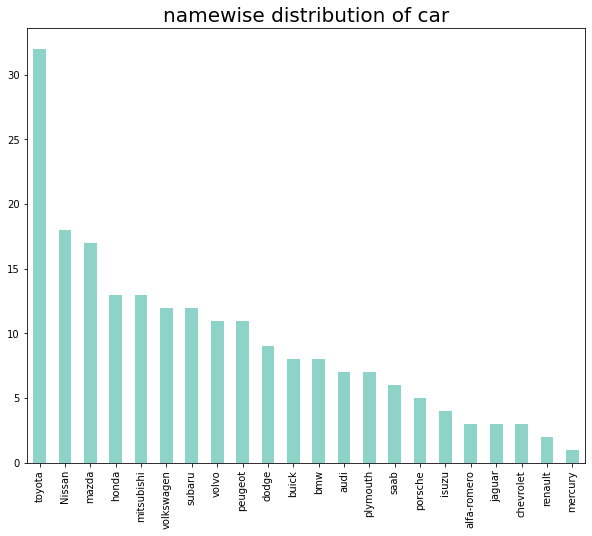

In [33]:
plt.figure(figsize=(10,8))
car['CarName'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set3')
plt.title("namewise distribution of car",fontsize=20)

most of people like toyota and very less people 

Text(0.5, 1.0, 'carname and price')

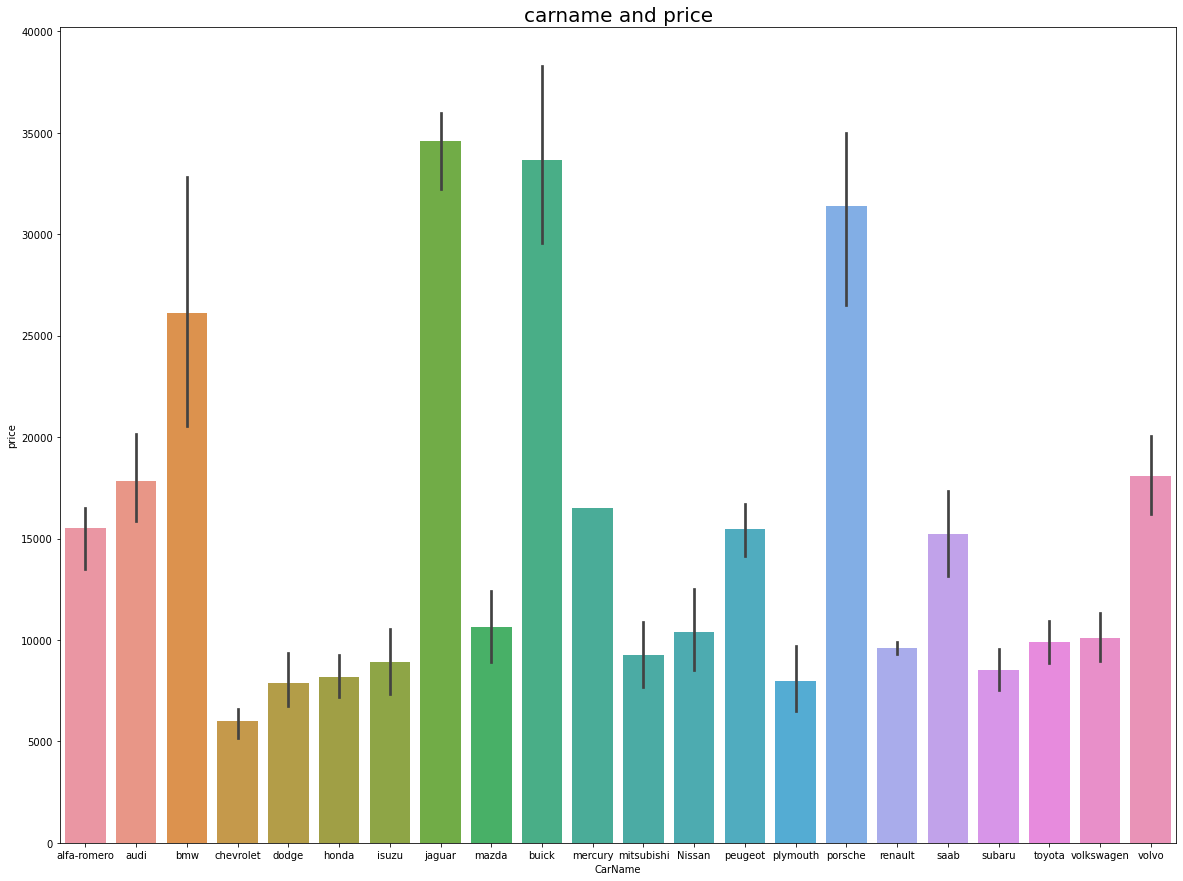

In [34]:
plt.figure(figsize=(20,15))
sns.barplot(x="CarName",y="price",data=car)
plt.title("carname and price",fontsize=20)

jaguar,buich,porsche,bmw are most costly car and chevrolet list price car

In [35]:
cat

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

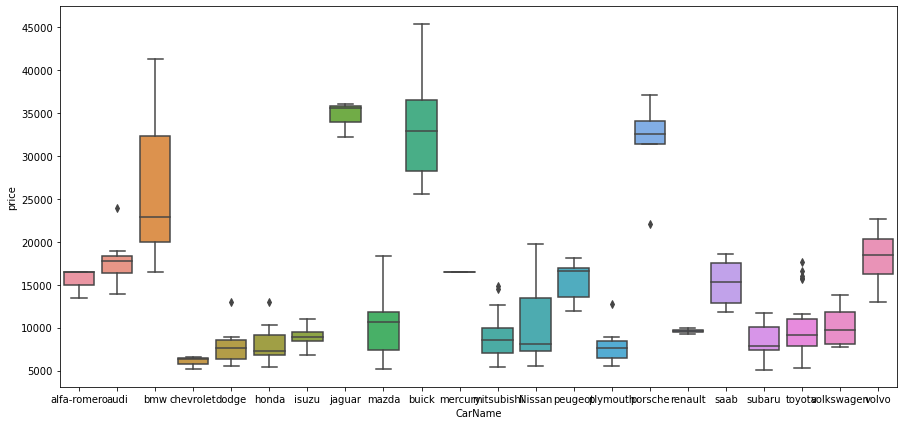

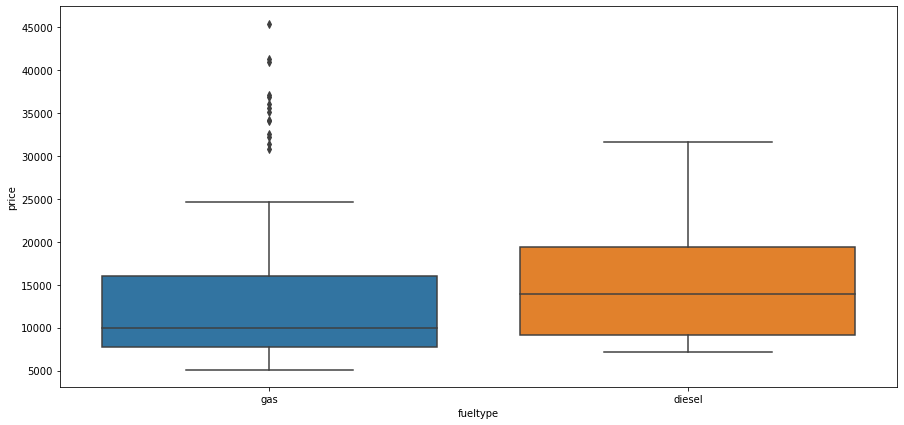

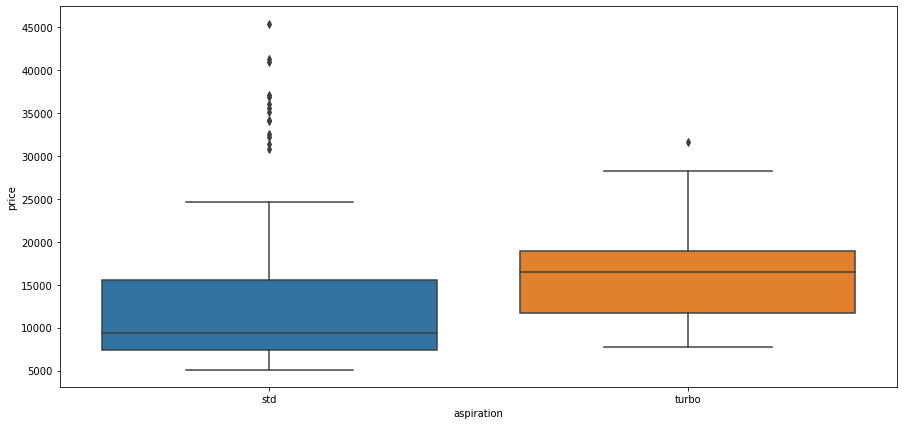

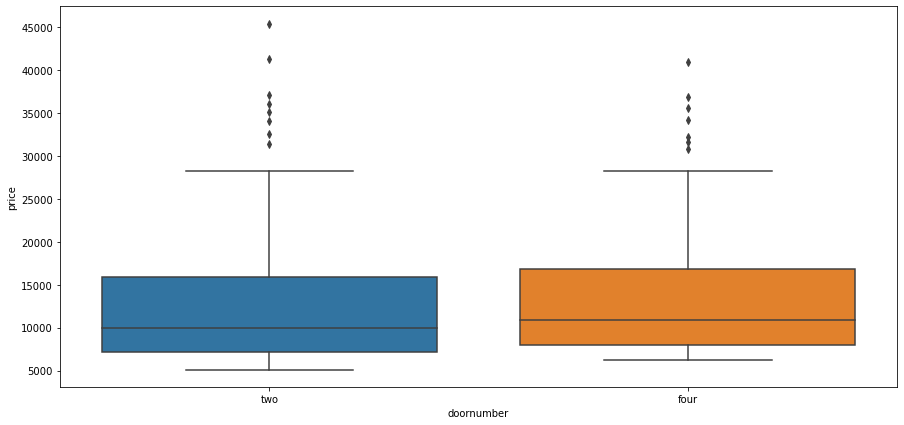

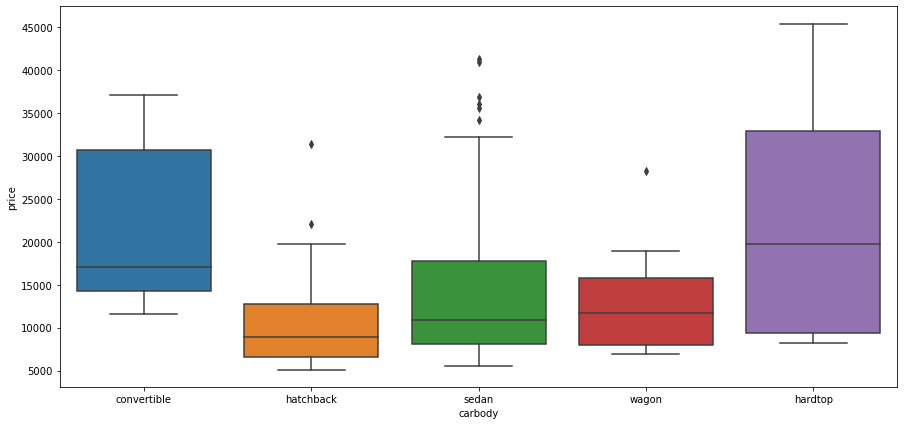

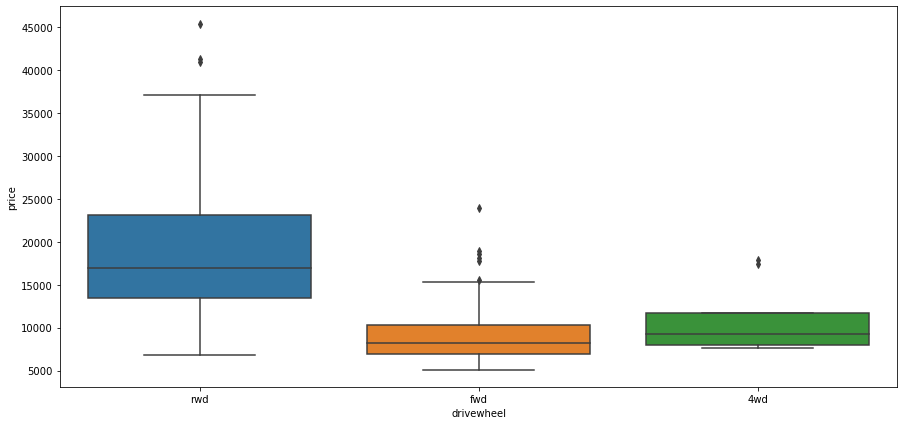

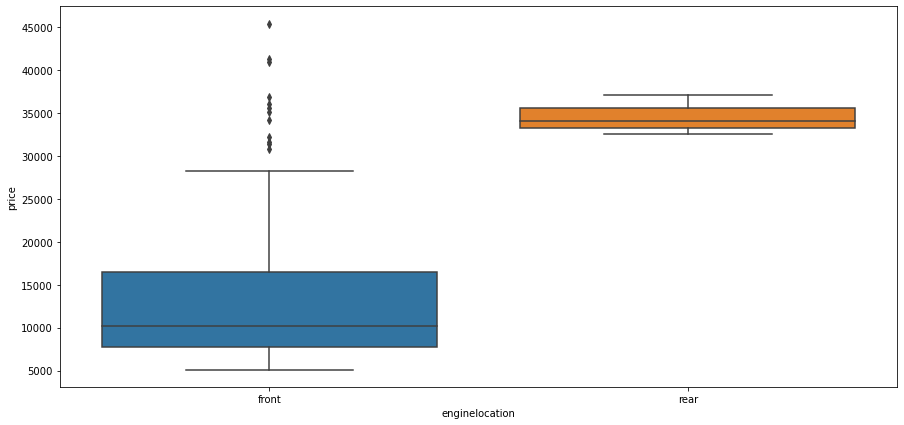

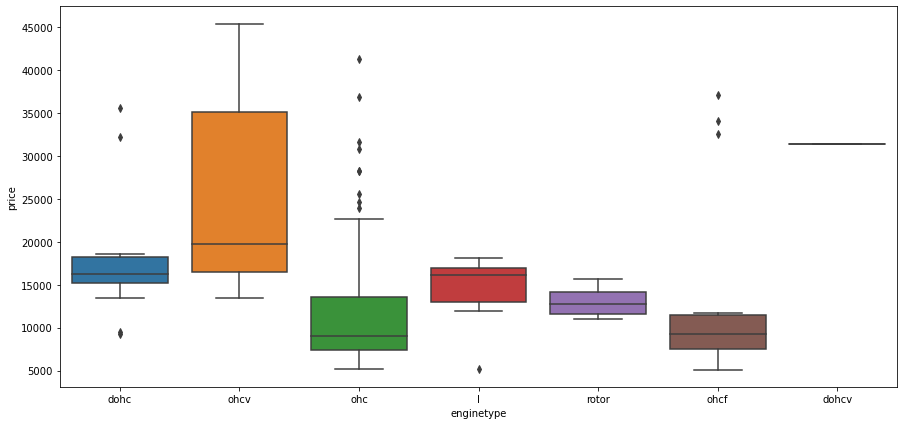

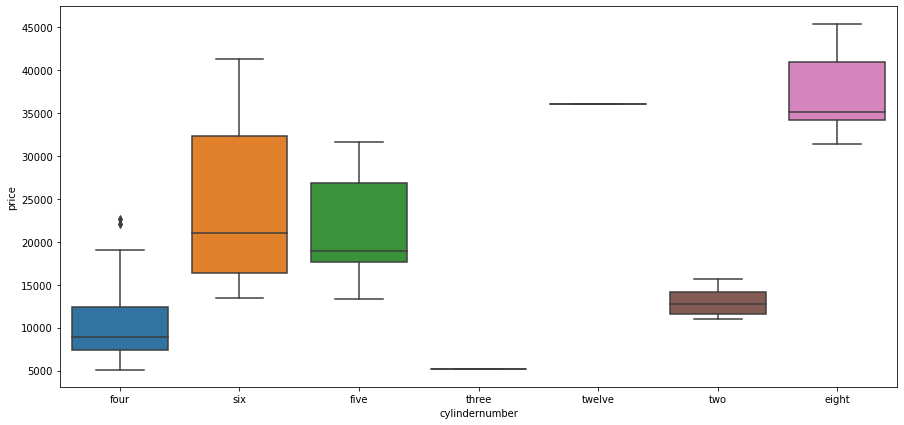

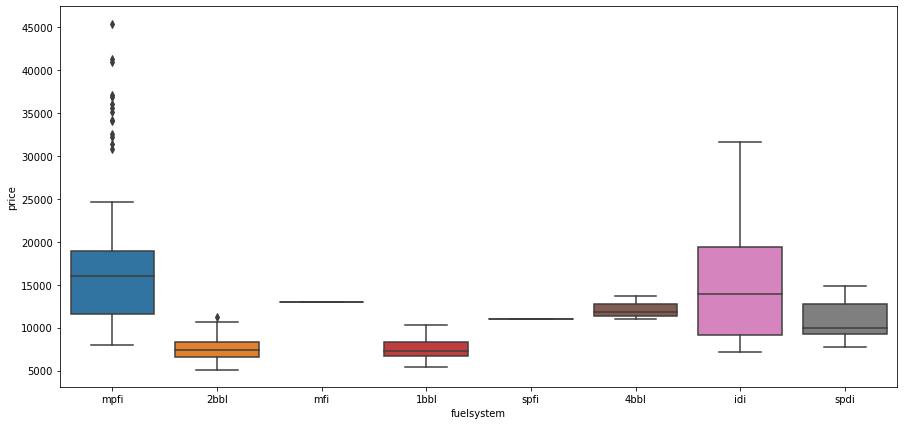

In [36]:

for i in cat:
    plt.subplots(figsize=(15, 7))
    sns.boxplot(x=i,y="price",data=car)

we alredy descuss on car price and car name so move on next column or future
FUELTYPE--> in fueltype we can esaly identify DIESAL car more expancive than gas.
ASPIRATION--> 


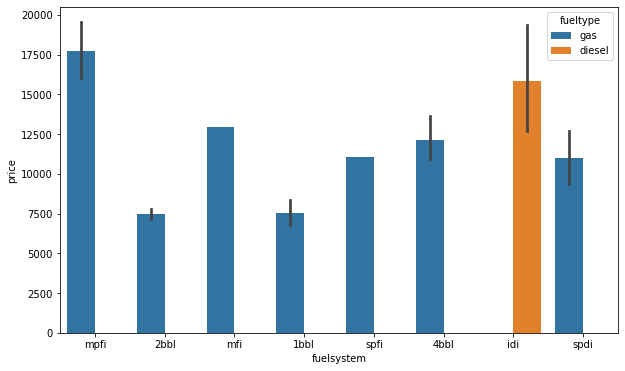

In [37]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'fuelsystem', y = 'price', hue = 'fueltype', data = car)
plt.show()

In [38]:
car.head(2)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [39]:
car.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [40]:
car["doornumber"].unique()

array(['two', 'four'], dtype=object)

In [41]:
#car["doornumber"]=car["doornumber"].replace(["two","four"],[2,4])

In [42]:
car['doornumber'] = car['doornumber'].replace({'two':2, 'four':4})

<AxesSubplot:xlabel='symboling', ylabel='count'>

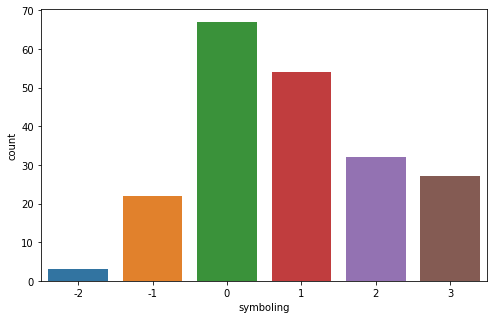

In [43]:

plt.subplots(figsize=(8, 5))
sns.countplot(x="symboling",data=car)

 symboling with 0 and 1 values have high number of rows (high sold.)

Text(0.5, 1.0, 'carname with fueltype')

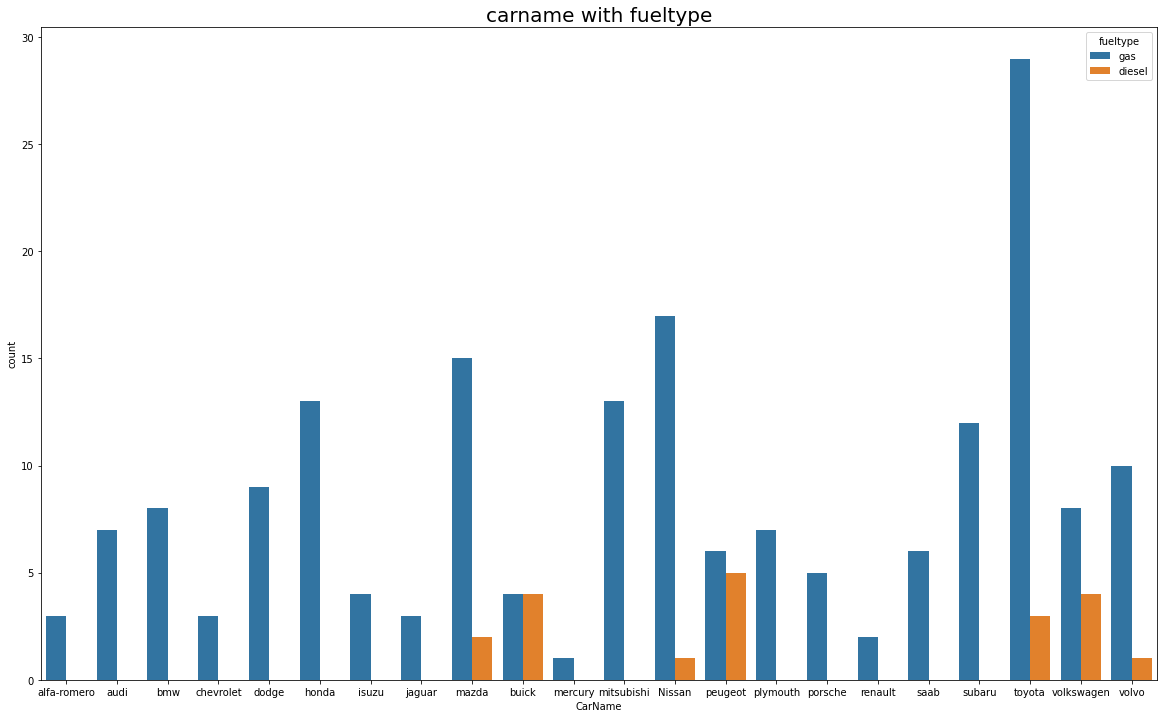

In [44]:
plt.figure(figsize=(20,12))
sns.countplot(x="CarName",data=car,hue="fueltype")
plt.title('carname with fueltype',fontsize=20)



we can esaly understand by the above graph some company are both type like GAS and DIESEL
Maximun company manufacture only gar type

Text(0.5, 1.0, 'destribution of doornumber with fueltype')

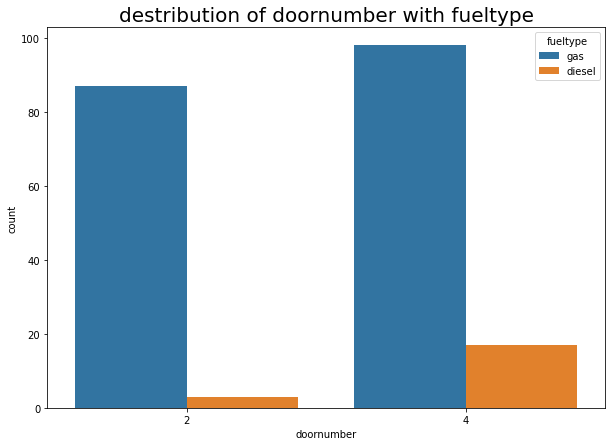

In [45]:
plt.figure(figsize=(10,7))
sns.countplot(x="doornumber",data=car,hue="fueltype")
plt.title('destribution of doornumber with fueltype',fontsize=20)


2 door has lowest diesel ac compair to 4 doors

In [46]:
car.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

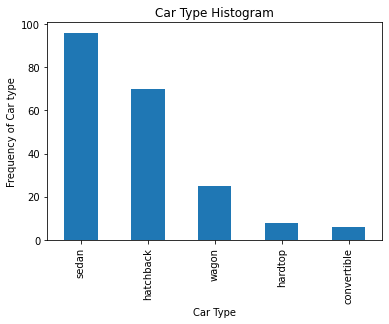

In [47]:
plt1 = car.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

sedan is the most higher car type 

In [48]:
car['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

<AxesSubplot:xlabel='carbody'>

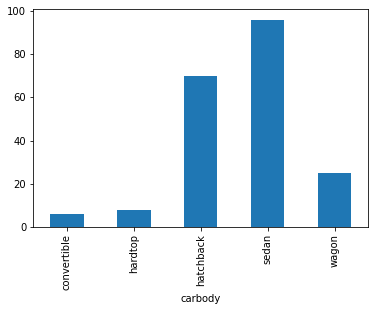

In [49]:
car.groupby(['carbody']).size().plot(kind = "bar")

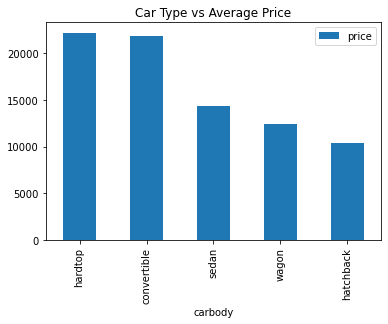

In [50]:


df = pd.DataFrame(car.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

hardtop and convertible has high price

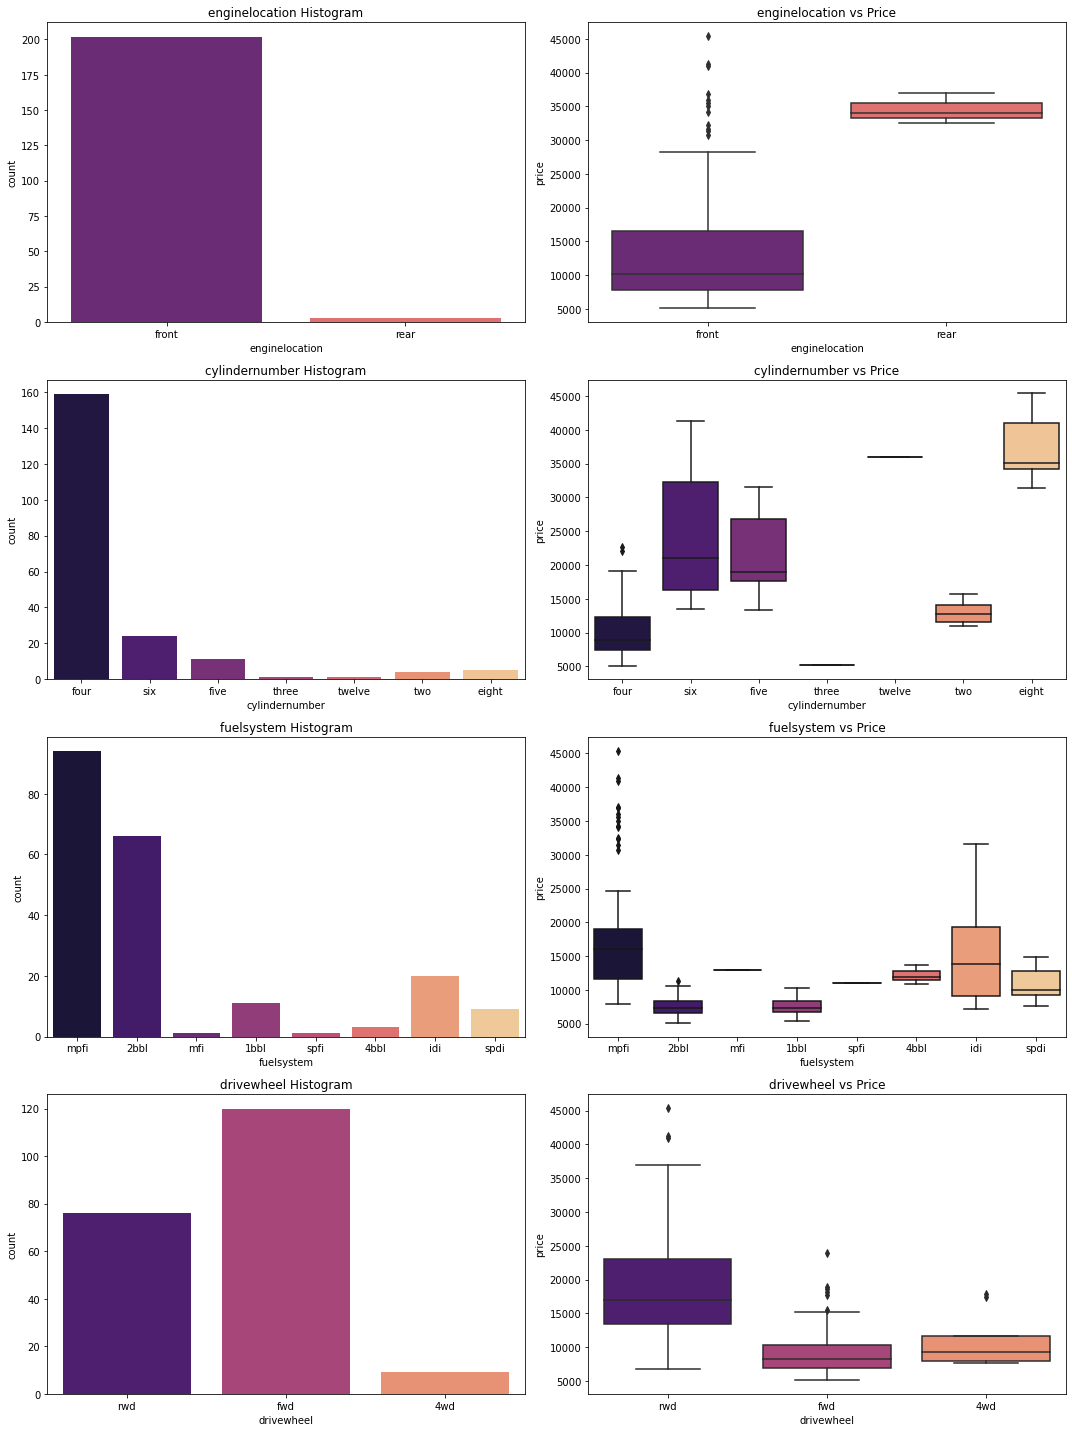

In [51]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(car[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=car[x], y=car.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()


Text(0.5, 1.0, 'carwidth vs price')

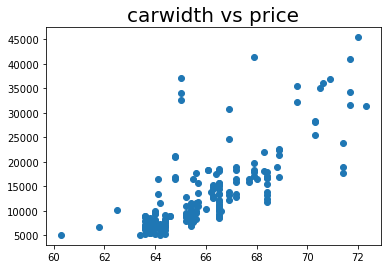

In [52]:


plt.scatter(x="carwidth",y='price',data=car)
plt.title("carwidth vs price",fontsize=20)


#scatter('carwidth', 2)
#scatter('carheight', 3)
#scatter('curbweight', 4)

carwidth and price have positive correlation

Text(0.5, 1.0, 'carlength vs price')

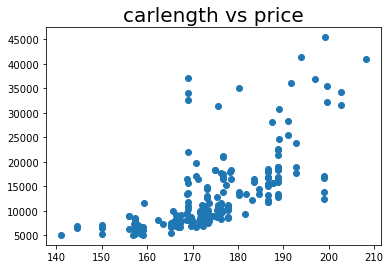

In [53]:
plt.scatter(x="carlength",y='price',data=car)
plt.title("carlength vs price",fontsize=20)


carlenth and price show positive correlation

Text(0.5, 1.0, 'carheight vs price')

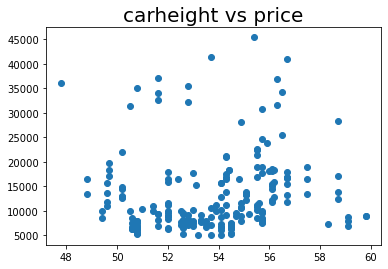

In [54]:
plt.scatter(x="carheight",y='price',data=car)
plt.title("carheight vs price",fontsize=20)


not show any positive correlation

Text(0.5, 1.0, 'curbweight vs price')

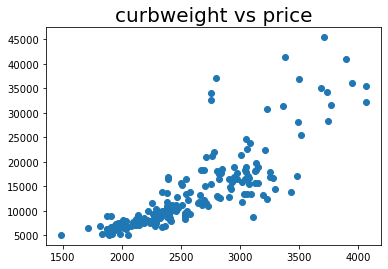

In [55]:
plt.scatter(x="curbweight",y='price',data=car)
plt.title("curbweight vs price",fontsize=20)

curbweight and price has positive correlation

In [56]:
car.head(2)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


# remove outliers

In [58]:
for col in numeric: 
    q1 = car[col].quantile(0.25)
    q3 = car[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    df_car = car.loc[(car[col] > range_low) & (car[col] < range_high)]

df_car.shape

(190, 25)

In [60]:
#split the data in independent and dependent variable
x=df_car.drop(['price'],axis=1)
y=df_car.price

In [61]:
cat

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [62]:
from sklearn import preprocessing

In [63]:
le = preprocessing.LabelEncoder()


In [64]:
for i in cat:    
    car[i]=le.fit_transform(car[i].astype("str"))


In [65]:
car.head(2) #check the data are converted

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,1,0,0,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,1,0,0,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0


In [66]:
#check the correlation
car.corr()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.098541,0.194311,-0.059866,-0.664073,-0.596135,-0.041671,0.212471,-0.531954,-0.357612,...,-0.105790,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
CarName,-0.098541,1.000000,-0.065597,0.060091,0.143542,0.053781,-0.007548,0.060707,0.061688,0.057615,...,-0.157652,0.146779,0.201519,-0.201044,0.086201,-0.091439,-0.143058,0.053777,0.055715,-0.173728
fueltype,0.194311,-0.065597,1.000000,-0.401397,-0.191491,-0.147853,-0.132257,0.040070,-0.308346,-0.212679,...,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,-0.059866,0.060091,-0.401397,1.000000,0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,...,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,-0.664073,0.143542,-0.191491,0.031792,1.000000,0.680358,-0.098954,-0.137757,0.447357,0.398568,...,0.020742,-0.015519,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
carbody,-0.596135,0.053781,-0.147853,0.063028,0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,...,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,-0.041671,-0.007548,-0.132257,0.066465,-0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,...,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.212471,0.060707,0.040070,-0.057191,-0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,...,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,-0.531954,0.061688,-0.308346,0.257611,0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,...,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.057615,-0.212679,0.234539,0.398568,0.334433,0.485649,-0.050989,0.874587,1.000000,...,0.683360,0.557810,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920


# outlier remove

In [67]:
for col in numeric: 
    q1 = car[col].quantile(0.25)
    q3 = car[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    df_car = car.loc[(car[col] > range_low) & (car[col] < range_high)]

df_car.shape

(190, 25)

In [68]:
car.shape

(205, 25)

In [69]:
#split the data in independent and dependent variable
x=df_car.drop(['price'],axis=1)
y=df_car.price

In [70]:
x.shape   #independent variable 

(190, 24)

In [71]:
y.shape   #dependent variable

(190,)

# Rescaling the Features with Min-max scaling (Normalization)

In [72]:
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit_transform(x))

[[ 1.76329902 -1.575546    0.33333333 ... -0.26464004 -0.79840694
  -0.69992345]
 [ 1.76329902 -1.575546    0.33333333 ... -0.26464004 -0.79840694
  -0.69992345]
 [ 0.13299822 -1.575546    0.33333333 ... -0.26464004 -1.1211672
  -0.85473772]
 ...
 [-1.49730257  1.31955786  0.33333333 ...  0.79839605 -1.28254732
  -1.31918052]
 [-1.49730257  1.31955786 -3.         ... -0.68985447  0.00849369
  -0.69992345]
 [-1.49730257  1.31955786  0.33333333 ...  0.58578883 -1.1211672
  -1.00955199]]


In [73]:
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,1,0,0,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,1,0,0,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,0,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,2,1,0,1,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,2,1,0,1,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [74]:
df_car.describe()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.0,190.000000,190.000000,...,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,0.836842,11.884211,0.900000,0.189474,0.568421,2.652632,1.273684,0.0,98.276316,172.811579,...,118.415789,3.126316,3.303579,3.251263,10.183789,97.231579,5124.473684,25.947368,31.521053,11509.400879
std,1.230009,6.926467,0.300793,0.392920,0.496605,0.819968,0.543204,0.0,5.280965,11.375806,...,26.854315,2.032759,0.261671,0.304045,4.015859,30.225940,471.593591,6.212921,6.476419,4968.444389
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,86.600000,141.100000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,16.000000,20.000000,5118.000000
25%,0.000000,6.250000,1.000000,0.000000,0.000000,2.000000,1.000000,0.0,94.500000,166.300000,...,97.000000,1.000000,3.130000,3.127500,8.700000,70.000000,4800.000000,21.000000,26.000000,7701.250000
50%,1.000000,12.000000,1.000000,0.000000,1.000000,3.000000,1.000000,0.0,96.500000,172.500000,...,110.000000,3.000000,3.270000,3.290000,9.000000,92.000000,5200.000000,25.000000,31.000000,9959.500000
75%,2.000000,19.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.0,100.400000,178.350000,...,136.000000,5.000000,3.540000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,15197.500000
max,3.000000,21.000000,1.000000,1.000000,1.000000,4.000000,2.000000,0.0,114.200000,198.900000,...,183.000000,7.000000,3.940000,3.900000,23.000000,200.000000,6600.000000,49.000000,54.000000,28248.000000


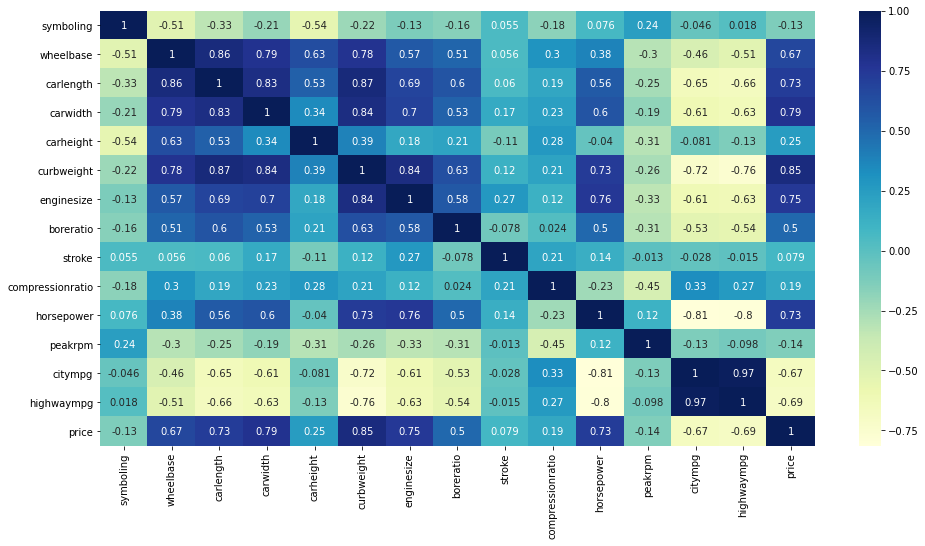

In [75]:
plt.figure(figsize = (16, 8))
sns.heatmap(df_car[numeric].corr(), annot = True, cmap="YlGnBu")
plt.show()

# multicollinearity

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [77]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [78]:
# Statsmodel 
import statsmodels.api as sm
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
#R-squared
from sklearn.metrics import r2_score

In [79]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [80]:
# RFE with the number of variables 20. It will select top 20 features.
from sklearn.feature_selection import RFE
#rfe = RFE(lm, 20)
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)

ref = rfe.fit(x_train,y_train)

In [81]:
ref

RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)

In [82]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('symboling', False, 11),
 ('CarName', True, 1),
 ('fueltype', False, 20),
 ('aspiration', False, 7),
 ('doornumber', False, 18),
 ('carbody', False, 4),
 ('drivewheel', False, 3),
 ('enginelocation', False, 19),
 ('wheelbase', False, 16),
 ('carlength', False, 8),
 ('carwidth', True, 1),
 ('carheight', False, 10),
 ('curbweight', True, 1),
 ('enginetype', False, 14),
 ('cylindernumber', False, 12),
 ('enginesize', True, 1),
 ('fuelsystem', False, 15),
 ('boreratio', False, 17),
 ('stroke', False, 2),
 ('compressionratio', False, 9),
 ('horsepower', True, 1),
 ('peakrpm', False, 13),
 ('citympg', False, 6),
 ('highwaympg', False, 5)]

In [83]:
# The top  features selected by the RFE
rfe_cols = x_train.columns[rfe.support_]
rfe_cols

Index(['CarName', 'carwidth', 'curbweight', 'enginesize', 'horsepower'], dtype='object')

In [84]:
# Not selected features by RFE
x_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carheight',
       'enginetype', 'cylindernumber', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [85]:
# Creating X_train dataframe with RFE selected variables
x_train_1 = x_train[rfe_cols]

In [86]:
x_train.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
29,3,6,1,1,0,2,1,0,95.9,173.2,...,2,156,4,3.60,3.90,7.00,145,5000,19,24
41,0,7,1,0,1,3,1,0,96.5,175.4,...,2,110,5,3.15,3.58,9.00,101,5800,24,28
132,3,17,1,0,0,2,1,0,99.1,186.6,...,2,121,5,3.54,3.07,9.31,110,5250,21,28
171,2,19,1,0,0,2,2,0,98.4,176.2,...,2,146,5,3.62,3.50,9.30,116,4800,24,30
148,0,18,1,0,1,4,0,0,96.9,173.6,...,2,108,1,3.62,2.64,9.00,82,4800,23,29


In [87]:
# Adding constant because statsmodel library doesn't include the intercept by default. 
x_train_sm_1 = sm.add_constant(x_train_1)

In [88]:
dt_1 = sm.OLS(y_train, x_train_sm_1)

In [89]:
# Fit the model
dt_model_1 = dt_1.fit()

In [90]:
print(dt_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     99.84
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           2.81e-42
Time:                        09:19:40   Log-Likelihood:                -1220.3
No. Observations:                 133   AIC:                             2453.
Df Residuals:                     127   BIC:                             2470.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.026e+04   1.06e+04     -5.673      0.0

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# LinearRegression

In [96]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# The coefficients
print("Coefficients: \n", lr.coef_)
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

MAE: 1681.553752351548
MSE: 4815841.653926991
RMSE: 2194.502598295794
Coefficients: 
 [ 1.08658433e+02 -1.09645418e+02  1.89918835e+04  1.96266561e+03
  1.00886859e+03 -6.32072459e+02  1.55914702e+03  5.55360202e-11
  7.62396238e+01 -1.00075861e+02  7.46147857e+02  1.25708835e+02
  4.29606363e+00  6.59828182e+01 -7.11106976e+02  6.86884008e+00
  1.10405879e+02 -6.35586325e+02 -1.65926230e+03  1.55267503e+03
  2.92608993e+01 -1.08674341e-01 -2.91546408e+02  1.26085744e+02]
Coefficient of determination: 0.72


Text(0, 0.5, 'Real value')

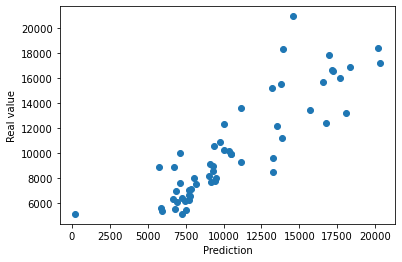

In [97]:
plt.scatter(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')

# KNeighborsRegressor

In [115]:
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2",r2_score(y_test, y_pred))


MAE: 1624.350298245614
MSE: 4907931.670519105
RMSE: 2215.385219441329
r2 0.7130878510772423


Text(0, 0.5, 'Real value')

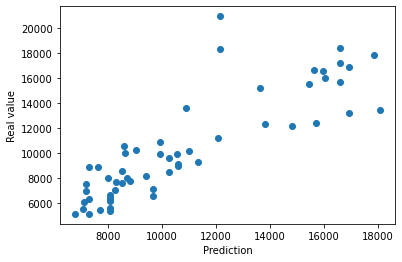

In [116]:
plt.scatter(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')

# DecisionTreeRegressor

In [101]:
dt =DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2",r2_score(y_test, y_pred))

MAE: 1309.152052631579
MSE: 3605790.304980509
RMSE: 1898.8918623714487
r2 0.7892095663879971


Text(0, 0.5, 'Real value')

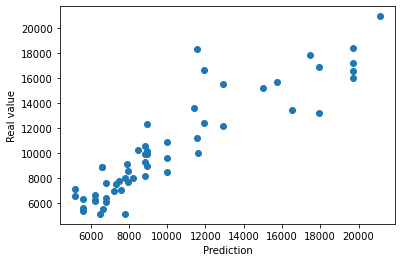

In [102]:
plt.scatter(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')

# Ridge and Lasso

In [104]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print("MAE",mean_absolute_error(y_test, y_pred))
print("MSE",mean_squared_error(y_test, y_pred))
print("Rsqur score",r2_score(y_test, y_pred))

MAE 1680.9919299102496
MSE 4814252.310719887
Rsqur score 0.7185642407733643


Text(0, 0.5, 'Real value')

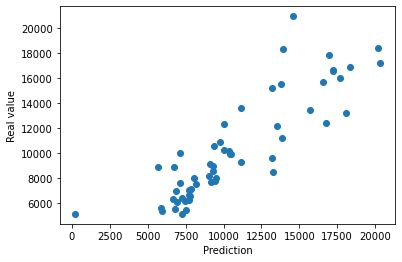

In [105]:
plt.scatter(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')

In [106]:
rdg = linear_model.Ridge(alpha=10)
rdg.fit(x_train, y_train)

y_pred = rdg.predict(x_test)

print("MAE",mean_absolute_error(y_test, y_pred))
print("MSE",mean_squared_error(y_test, y_pred))
print("Rsqur score",r2_score(y_test, y_pred))

MAE 1603.5780160575052
MSE 4606750.96649969
Rsqur score 0.73069453527852


Text(0, 0.5, 'Real value')

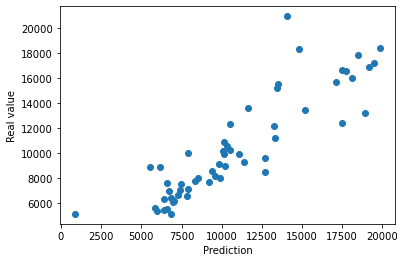

In [107]:
plt.scatter(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')

In [108]:
rdg = linear_model.Ridge(alpha=100)
rdg.fit(x_train, y_train)

y_pred = rdg.predict(x_test)

print("MAE",mean_absolute_error(y_test, y_pred))
print("MSE",mean_squared_error(y_test, y_pred))
print("Rsqur score",r2_score(y_test, y_pred))

MAE 1569.118827459306
MSE 4395893.593179141
Rsqur score 0.7430210194590157


In [119]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-3,3,num=14) # range for alpha

grid = GridSearchCV(estimator=Lasso(), param_grid=dict(alpha=alphas))
grid.fit(x_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.7637249831788926
0.2030917620904737


Text(0, 0.5, 'Real value')

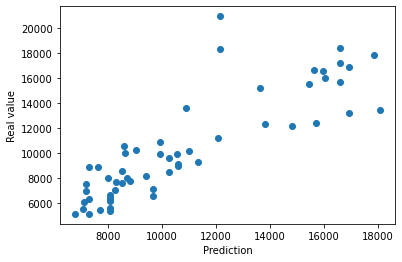

In [120]:
plt.scatter(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Real value')

In [122]:
*********************************************************************

SyntaxError: invalid syntax (<ipython-input-122-ddc382d418e0>, line 1)

In [92]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
lm = LinearRegression()
lm.fit(x_train,y_train)
#rfe = RFE(lm, 10)
#rfe = rfe.fit(x_train, y_train)

LinearRegression()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, max_depth=10)


In [ ]:
from sklearn.feature_selection import RFE
# here we want only one final feature, we do this to produce a ranking
n_features_to_select = 1
rfe = RFE(regressor, n_features_to_select=n_features_to_select)
rfe.fit(x_train, y_train)


In [ ]:
from operator import itemgetter
features = x_train.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

In [ ]:
# now print out the features in order of ranking
n_features_to_select = 10
rfe = RFE(regressor, n_features_to_select=n_features_to_select)
rfe.fit(x_train, y_train)


In [ ]:
predictions = rfe.predict(x_test)

In [ ]:
predictions

In [ ]:
car.describe()